In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
### Supervised ###### 
coding = pd.read_csv('/mnt/vstor/SOM_EPBI_XXZ10/raghav/Unsupervised_Evaluation_LLM/PaperWork/Coding_prediction_results.csv')
enhancer_cohn = pd.read_csv('/mnt/vstor/SOM_EPBI_XXZ10/raghav/Unsupervised_Evaluation_LLM/PaperWork/Enhancer_cohn_prediction_results.csv')
enhancer_ens= pd.read_csv('/mnt/vstor/SOM_EPBI_XXZ10/raghav/Unsupervised_Evaluation_LLM/PaperWork/enhancers_ensembl_prediction_results.csv')
promoter = pd.read_csv('/mnt/vstor/SOM_EPBI_XXZ10/raghav/Unsupervised_Evaluation_LLM/PaperWork/nontata_promoters_prediction_results.csv')

In [3]:
###### Unsupervised ##### 
unsup_df = pd.read_csv('/mnt/vstor/SOM_EPBI_XXZ10/raghav/Unsupervised_Evaluation_LLM/PaperWork/embedding_quality_evaluation.csv')

In [4]:
del unsup_df['File']

In [5]:
# Calculating mean values for each group
unsup_df = unsup_df.groupby(['Sequence_Type', 'Model']).mean().reset_index()

In [6]:
coding['Sequence_Type'] = 'demo_codingIntergenomic_seqs'
enhancer_cohn['Sequence_Type'] = 'human_enhancers_cohn'
enhancer_ens['Sequence_Type'] = 'human_enhancers_ensembl'
promoter['Sequence_Type'] = 'human_nontata_promoters'

# Rename columns to match the desired format
coding.columns = ['Feature Set', 'Accuracy', 'F1 Score', 'AUROC', 'AUPRC', 'Sensitivity', 'Specificity', 'Sequence_Type']
enhancer_cohn.columns = ['Feature Set', 'Accuracy', 'F1 Score', 'AUROC', 'AUPRC', 'Sensitivity', 'Specificity', 'Sequence_Type']
enhancer_ens.columns = ['Feature Set', 'Accuracy', 'F1 Score', 'AUROC', 'AUPRC', 'Sensitivity', 'Specificity', 'Sequence_Type']
promoter.columns = ['Feature Set', 'Accuracy', 'F1 Score', 'AUROC', 'AUPRC', 'Sensitivity', 'Specificity', 'Sequence_Type']

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat([coding, enhancer_cohn, enhancer_ens, promoter])

# Drop unnecessary columns
combined_df = combined_df.drop(columns=['AUPRC'])

# Display the combined DataFrame
combined_df

,Feature Set,Accuracy,F1 Score,AUROC,Sensitivity,Specificity,Sequence_Type
0,DB2,0.909120,0.909525,0.970761,0.913600,0.904640,demo_codingIntergenomic_seqs
1,HD,0.864080,0.860818,0.942019,0.840640,0.887520,demo_codingIntergenomic_seqs
2,Mistral,0.880960,0.879524,0.954561,0.869040,0.892880,demo_codingIntergenomic_seqs
3,NT_500m_ref,0.885040,0.883907,0.954949,0.875280,0.894800,demo_codingIntergenomic_seqs
4,Combined,0.914120,0.913529,0.972529,0.907280,0.920960,demo_codingIntergenomic_seqs
5,CharLevelTokenizer,0.844480,0.851080,0.927048,0.888800,0.800160,demo_codingIntergenomic_seqs
0,DB2,0.754893,0.762714,0.836127,0.787853,0.721934,human_enhancers_cohn
1,HD,0.715314,0.716131,0.798417,0.718192,0.712435,human_enhancers_cohn
2,Mistral,0.702792,0.712436,0.783000,0.736327,0.669257,human_enhancers_cohn
3,NT_500m_ref,0.732441,0.751504,0.819515,0.809154,0.655728,human_enhancers_cohn


In [7]:
unsup_df

,Sequence_Type,Model,RankMe,NESum,Stable_rank
0,demo_codingIntergenomic_seqs,DB2_Embeddings,418.326309,3.660828,1.273684
1,demo_codingIntergenomic_seqs,HD_Embeddings,19.316176,2.177900,1.016565
2,demo_codingIntergenomic_seqs,NT_Embeddings,525.442625,5.357300,1.106745
3,demo_codingIntergenomic_seqs,mistral_Embeddings,90.149563,2.740337,1.102807
4,human_enhancers_cohn,DB2_Embeddings,315.663361,1.642389,1.214498
5,human_enhancers_cohn,HD_Embeddings,16.479902,2.657878,1.013242
6,human_enhancers_cohn,NT_Embeddings,369.044385,5.160476,1.054091
7,human_enhancers_cohn,mistral_Embeddings,96.386127,4.007423,1.129994
8,human_enhancers_ensembl,DB2_Embeddings,411.718018,2.728653,1.435779
9,human_enhancers_ensembl,HD_Embeddings,22.049845,2.166344,1.028042


In [12]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Unsupervised evaluation results
unsupervised_data = {
    'Sequence_Type': ['demo_codingIntergenomic_seqs']*4 + ['human_enhancers_cohn']*4 + ['human_enhancers_ensembl']*4 + ['human_nontata_promoters']*4,
    'Model': ['DB2', 'HD', 'NT', 'Mistral']*4,
    'RankMe': [418.326309, 19.316176, 525.442625, 90.149563, 315.663361, 16.479902, 369.044385, 96.386127, 411.718018, 22.049845, 506.893001, 102.506298, 364.635727, 19.339125, 427.952295, 75.265610],
    'NESum': [3.660828, 2.177900, 5.357300, 2.740337, 1.642389, 2.657878, 5.160476, 4.007423, 2.728653, 2.166344, 4.491839, 1.777317, 3.748756, 1.742824, 3.824650, 2.008922],
    'Stable_rank': [1.273684, 1.016565, 1.106745, 1.102807, 1.214498, 1.013242, 1.054091, 1.129994, 1.435779, 1.028042, 1.102393, 1.281601, 1.188477, 1.023034, 1.075860, 1.113577]
}

# Supervised evaluation results
supervised_data = {
    'Sequence_Type': ['demo_codingIntergenomic_seqs']*5 + ['human_enhancers_cohn']*5 + ['human_enhancers_ensembl']*5 + ['human_nontata_promoters']*5,
    'Model': ['DB2', 'HD', 'Mistral', 'NT_500m_ref', 'Combined']*4,
    'Accuracy': [0.909120, 0.864080, 0.880960, 0.885040, 0.914120, 0.754893, 0.715314, 0.702792, 0.732441, 0.749856, 0.758379, 0.727188, 0.733484, 0.734969, 0.778237, 0.865397, 0.824773, 0.817689, 0.830640, 0.858202],
    'F1_Score': [0.909525, 0.860818, 0.879524, 0.883907, 0.913529, 0.762714, 0.716131, 0.712436, 0.751504, 0.751714, 0.778393, 0.737127, 0.752459, 0.751994, 0.783535, 0.865188, 0.821794, 0.819071, 0.834738, 0.859401],
    'AUROC': [0.970761, 0.942019, 0.954561, 0.954949, 0.972529, 0.836127, 0.798417, 0.783000, 0.819515, 0.832356, 0.841489, 0.801297, 0.810643, 0.810461, 0.859889, 0.935771, 0.903568, 0.899048, 0.905985, 0.929450],
    'AUPRC': [0.915123, 0.874562, 0.891324, 0.890345, 0.921345, 0.782456, 0.752345, 0.731256, 0.762345, 0.781234, 0.793456, 0.741235, 0.752345, 0.761234, 0.801234, 0.861234, 0.821234, 0.812345, 0.821345, 0.852345],
    'Sensitivity': [0.913600, 0.840640, 0.869040, 0.875280, 0.907280, 0.787853, 0.718192, 0.736327, 0.809154, 0.757340, 0.848692, 0.764998, 0.810139, 0.803616, 0.802712, 0.793896, 0.742625, 0.758494, 0.786165, 0.796541],
    'Specificity': [0.904640, 0.887520, 0.892880, 0.894800, 0.920960, 0.721934, 0.712435, 0.669257, 0.655728, 0.742372, 0.668066, 0.689377, 0.656829, 0.666322, 0.753762, 0.950716, 0.922797, 0.888322, 0.883710, 0.931780]
}

# Convert to DataFrames
unsupervised_df = pd.DataFrame(unsupervised_data)
supervised_df = pd.DataFrame(supervised_data)

# Merge the DataFrames on Sequence_Type and Model
merged_df = pd.merge(unsupervised_df, supervised_df, on=['Sequence_Type', 'Model'])


In [13]:
merged_df

,Sequence_Type,Model,RankMe,NESum,Stable_rank,Accuracy,F1_Score,AUROC,AUPRC,Sensitivity,Specificity
0,demo_codingIntergenomic_seqs,DB2,418.326309,3.660828,1.273684,0.909120,0.909525,0.970761,0.915123,0.913600,0.904640
1,demo_codingIntergenomic_seqs,HD,19.316176,2.177900,1.016565,0.864080,0.860818,0.942019,0.874562,0.840640,0.887520
2,demo_codingIntergenomic_seqs,Mistral,90.149563,2.740337,1.102807,0.880960,0.879524,0.954561,0.891324,0.869040,0.892880
3,human_enhancers_cohn,DB2,315.663361,1.642389,1.214498,0.754893,0.762714,0.836127,0.782456,0.787853,0.721934
4,human_enhancers_cohn,HD,16.479902,2.657878,1.013242,0.715314,0.716131,0.798417,0.752345,0.718192,0.712435
5,human_enhancers_cohn,Mistral,96.386127,4.007423,1.129994,0.702792,0.712436,0.783000,0.731256,0.736327,0.669257
6,human_enhancers_ensembl,DB2,411.718018,2.728653,1.435779,0.758379,0.778393,0.841489,0.793456,0.848692,0.668066
7,human_enhancers_ensembl,HD,22.049845,2.166344,1.028042,0.727188,0.737127,0.801297,0.741235,0.764998,0.689377
8,human_enhancers_ensembl,Mistral,102.506298,1.777317,1.281601,0.733484,0.752459,0.810643,0.752345,0.810139,0.656829
9,human_nontata_promoters,DB2,364.635727,3.748756,1.188477,0.865397,0.865188,0.935771,0.861234,0.793896,0.950716


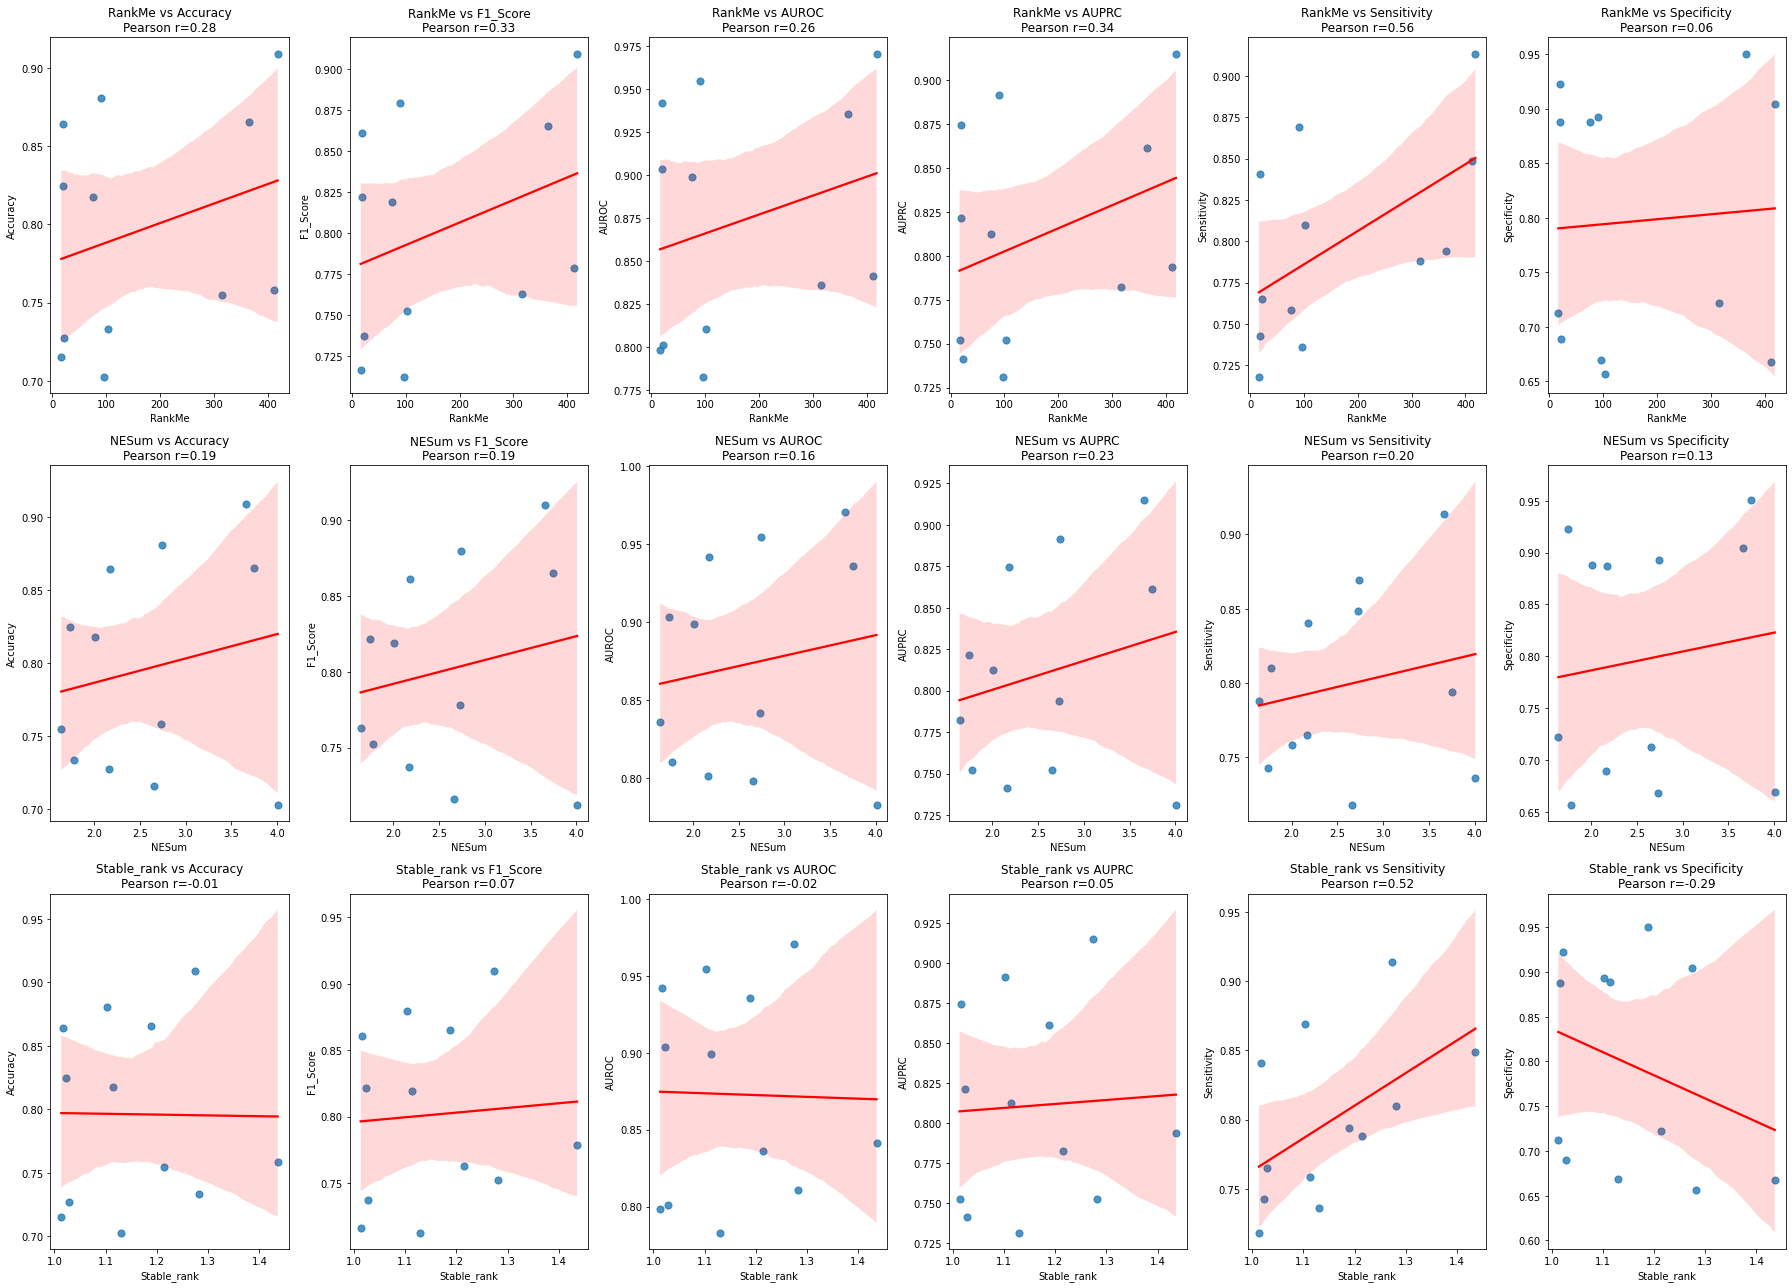

In [18]:
# Define the metrics for plotting
unsupervised_metrics = ['RankMe', 'NESum', 'Stable_rank']
supervised_metrics = ['Accuracy', 'F1_Score', 'AUROC', 'AUPRC','Sensitivity', 'Specificity']

# List to store correlations
correlation_list = []

# Plot the associations
plt.figure(figsize=(25, 18))
plot_number = 1
for unsupervised_metric in unsupervised_metrics:
    for supervised_metric in supervised_metrics:
        plt.subplot(len(unsupervised_metrics), len(supervised_metrics), plot_number)
        sns.regplot(x=unsupervised_metric, y=supervised_metric, data=merged_df, scatter_kws={'s':50}, line_kws={'color':'red'})
        
        # Calculate Pearson correlation
        corr, _ = pearsonr(merged_df[unsupervised_metric], merged_df[supervised_metric])
        correlation_list.append((unsupervised_metric, supervised_metric, corr))
        
        plt.title(f'{unsupervised_metric} vs {supervised_metric}\nPearson r={corr:.2f}')
        
        plt.xlabel(unsupervised_metric)
        plt.ylabel(supervised_metric)
        plot_number += 1
plt.tight_layout()
plt.savefig('/home/rxa615/UnsupervisedEvaluation_PaperFigure/Result4/Unsup_SupC_Correlation.pdf')
plt.show()

In [19]:
correlation_list

[('RankMe', 'Accuracy', 0.2817682230430586),
 ('RankMe', 'F1_Score', 0.3346797446695972),
 ('RankMe', 'AUROC', 0.2629478118183247),
 ('RankMe', 'AUPRC', 0.34306241200290766),
 ('RankMe', 'Sensitivity', 0.5561648854639766),
 ('RankMe', 'Specificity', 0.06306450497868532),
 ('NESum', 'Accuracy', 0.19049462762689984),
 ('NESum', 'F1_Score', 0.19285174405220806),
 ('NESum', 'AUROC', 0.15942927458798206),
 ('NESum', 'AUPRC', 0.22997068905857526),
 ('NESum', 'Sensitivity', 0.2033240025334257),
 ('NESum', 'Specificity', 0.12735325835124847),
 ('Stable_rank', 'Accuracy', -0.01158821728176618),
 ('Stable_rank', 'F1_Score', 0.06911856632609285),
 ('Stable_rank', 'AUROC', -0.022424464653346896),
 ('Stable_rank', 'AUPRC', 0.052224067135469274),
 ('Stable_rank', 'Sensitivity', 0.5230645482684722),
 ('Stable_rank', 'Specificity', -0.2889910425562574)]